In [38]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
df1 = pd.read_csv('feature_selection_top_states.csv')
df1['Date'] = pd.to_datetime(df1['Date'])

df1 = df1.set_index('Date')
df1.index = pd.to_datetime(df1.index)

df1

,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,new_cases_50_min,...,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,PEOPLE_POSITIVE_NEW_CASES_COUNT,PROVINCE_STATE_NAME,STATE
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,5.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
2020-03-02,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,5.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,5,California,0
2020-03-03,1.0,1.0,0.5,112.5,0.5,1.5,2.0,0.0,0.0,5.0,...,0.000000,2.5,26.848765,1.860398,5.818187,1.716470,0.000000,7,California,0
2020-03-04,1.0,1.0,0.0,112.5,0.0,1.0,1.0,0.0,0.0,5.0,...,0.000000,0.0,24.685185,1.860398,5.818187,1.716470,0.000000,10,California,0
2020-03-05,1.0,1.0,0.0,112.5,0.0,1.0,1.0,1.0,0.0,5.0,...,0.000000,0.0,25.753086,1.860398,5.818187,1.716470,0.000000,12,California,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,1.0,1.0,1.0,164.0,1.0,2.0,3.0,1.0,0.0,0.0,...,0.219948,5.0,26.817460,1.337448,5.387383,1.469608,0.695652,1243,Texas,1
2022-04-26,1.0,1.0,1.0,156.0,1.0,2.0,3.0,1.0,0.0,0.0,...,0.221604,5.0,23.325397,1.337448,5.387383,1.469608,0.695893,2556,Texas,1
2022-04-27,1.0,1.0,1.0,163.0,1.0,2.0,3.0,1.0,0.0,0.0,...,0.221844,5.0,24.674603,1.337448,5.387383,1.469608,0.696238,2513,Texas,1


## XGBoost

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [41]:
df_checkpoint = df1.sort_index()

In [42]:
df_train = df_checkpoint.iloc[:6715]
df_test = df_checkpoint.iloc[6715:]

In [43]:
X_train = df_train.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
X_train = X_train.sort_index()
y_train = df_train['PEOPLE_POSITIVE_NEW_CASES_COUNT']
y_train = y_train.sort_index()

X_test = df_test.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
X_test = X_test.sort_index()
y_test = df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT']
X_test = X_test.sort_index()


In [44]:
X_test

,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,new_cases_50_min,...,new_cases_100_mean,NATIVE_PEOPLES,booster_rate,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,STATE
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2.0,1.0,1.0,1263.0,2.0,2.0,3.0,0.0,0.0,0.0,...,6428.20,44261,0.223953,5.0,13.605556,2.045703,6.738398,2.103426,0.583583,6
2022-01-01,2.0,2.0,1.0,1226.0,2.0,2.0,3.0,1.0,0.0,0.0,...,8284.35,876556,0.223654,5.0,10.061111,1.894541,5.897176,1.830623,0.814215,0
2022-01-01,2.0,2.0,1.0,1011.0,3.0,2.0,3.0,0.0,0.0,3437.0,...,6618.58,70007,0.194723,5.0,12.259259,2.392852,6.946234,2.280349,0.719455,5
2022-01-01,1.0,0.0,1.0,667.0,2.0,2.0,3.0,0.0,0.0,0.0,...,6812.27,150093,0.189384,5.0,28.722222,2.705690,6.774205,2.794205,0.710064,4
2022-01-01,1.0,0.0,1.0,565.0,2.0,2.0,3.0,0.0,1.0,0.0,...,3200.76,182104,0.105199,5.0,25.516667,1.748112,6.354311,1.952599,0.729887,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,1.0,1.0,1.0,34.0,2.0,2.0,3.0,0.0,1.0,0.0,...,3133.21,75340,0.185411,5.0,26.783333,1.421367,5.925505,1.663100,0.546644,8
2022-04-29,1.0,1.0,1.0,95.0,1.0,2.0,3.0,0.0,0.0,0.0,...,9069.21,150093,0.254415,5.0,29.866667,2.705690,6.774205,2.794205,0.753405,4
2022-04-29,1.0,1.0,1.0,138.0,2.0,2.0,3.0,0.0,0.0,0.0,...,19127.60,876556,0.364550,5.0,24.544444,1.894541,5.897176,1.830623,0.819798,0


In [45]:
reg = xgb.XGBRegressor(learning_rate=0.3,n_estimators=100, early_stopping_rounds=10)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:6269.16117	validation_1-rmse:24922.50344
[1]	validation_0-rmse:4967.08111	validation_1-rmse:22305.11057
[2]	validation_0-rmse:4042.05871	validation_1-rmse:20203.43156
[3]	validation_0-rmse:3370.26102	validation_1-rmse:19412.50532
[4]	validation_0-rmse:2892.79674	validation_1-rmse:19650.28447
[5]	validation_0-rmse:2534.93982	validation_1-rmse:21084.23654
[6]	validation_0-rmse:2286.59599	validation_1-rmse:23127.29306
[7]	validation_0-rmse:2081.19377	validation_1-rmse:25208.34891
[8]	validation_0-rmse:1933.54418	validation_1-rmse:27196.51620
[9]	validation_0-rmse:1824.87475	validation_1-rmse:29038.22892
[10]	validation_0-rmse:1729.62530	validation_1-rmse:30649.52609
[11]	validation_0-rmse:1657.31705	validation_1-rmse:32054.47753
[12]	validation_0-rmse:1596.96667	validation_1-rmse:33281.66714
[13]	validation_0-rmse:1550.19593	validation_1-rmse:34350.60184


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

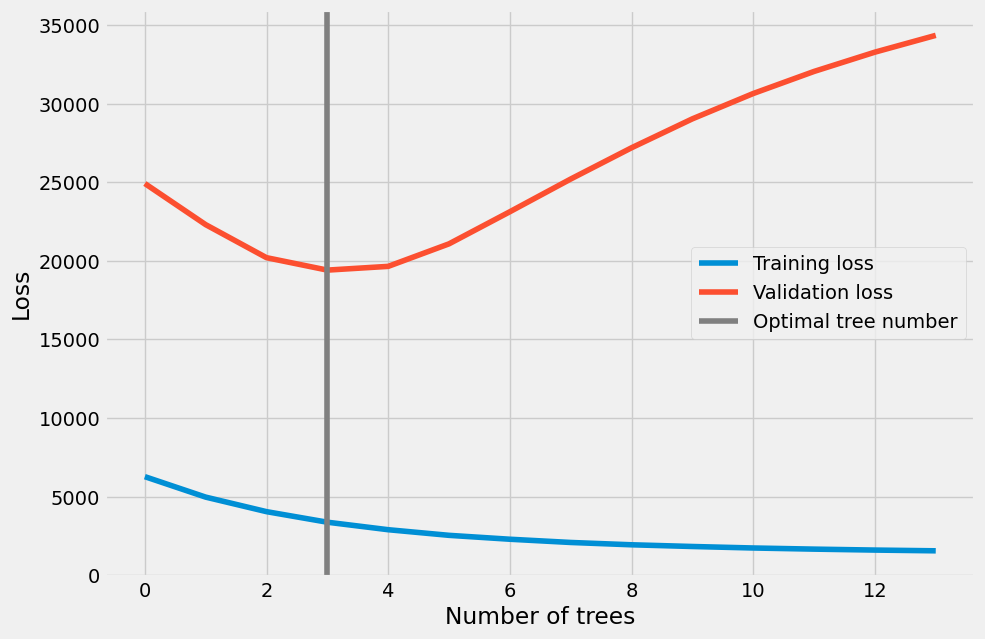

In [46]:
results = reg.evals_result()


plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(reg.best_iteration, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [47]:
reg.best_iteration


3

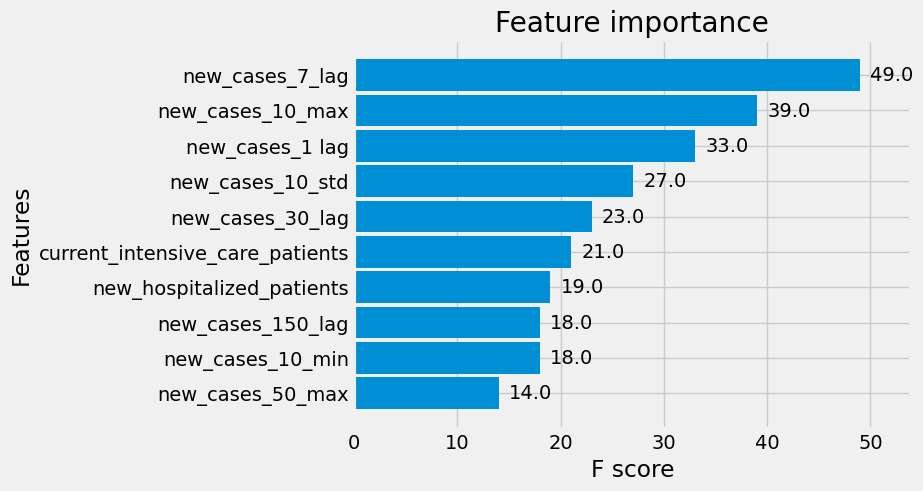

In [48]:
_ = plot_importance(reg, height=0.9 ,max_num_features = 10)


In [49]:
reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
df_test['Prediction'] = reg.predict(X_test)
df = pd.concat([df_test, df_train], sort=False)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_11260/1266703580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = reg.predict(X_test)


In [51]:
state_mapping = {
    'California': 0,
    'Texas': 1,
    'Illinois': 2,
    'New York': 3,
    'Florida': 4,
    'Pennsylvania': 5,
    'Ohio': 6,
    'North Carolina': 7,
    'Georgia': 8,
    'Michigan': 9
}

df_CA = df[df['STATE'] == 0]
df_TX = df[df['STATE'] == 1]
df_IL = df[df['STATE'] == 2]
df_NY = df[df['STATE'] == 3]
df_FL = df[df['STATE'] == 4]
df_PA = df[df['STATE'] == 5]
df_OH = df[df['STATE'] == 6]
df_NC = df[df['STATE'] == 7]
df_GA = df[df['STATE'] == 8]
df_MI = df[df['STATE'] == 9]


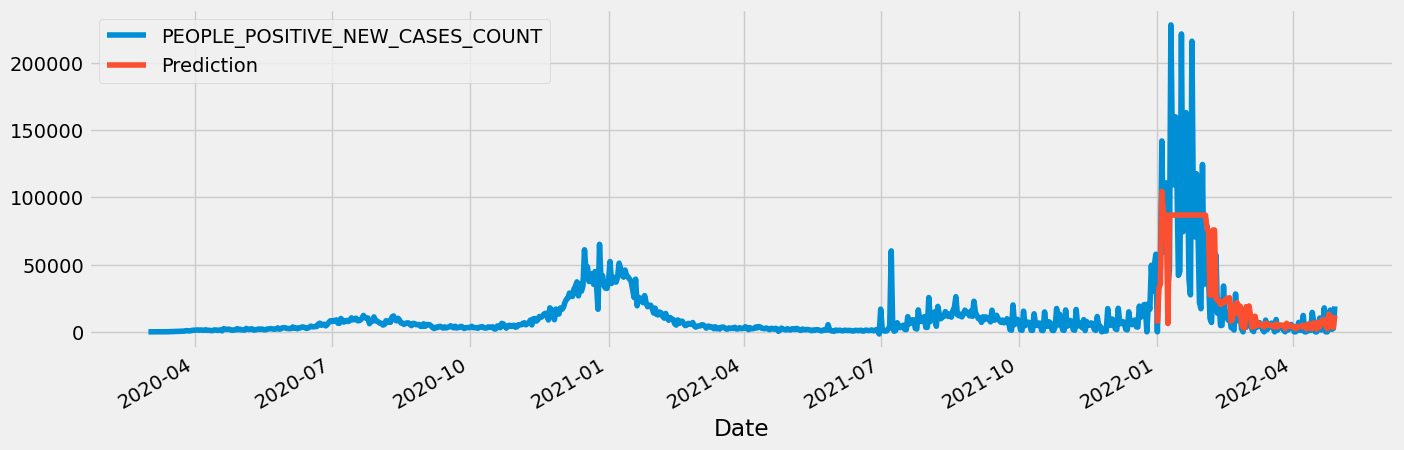

In [52]:
_ = df_CA[['PEOPLE_POSITIVE_NEW_CASES_COUNT','Prediction']].plot(figsize=(15, 5))

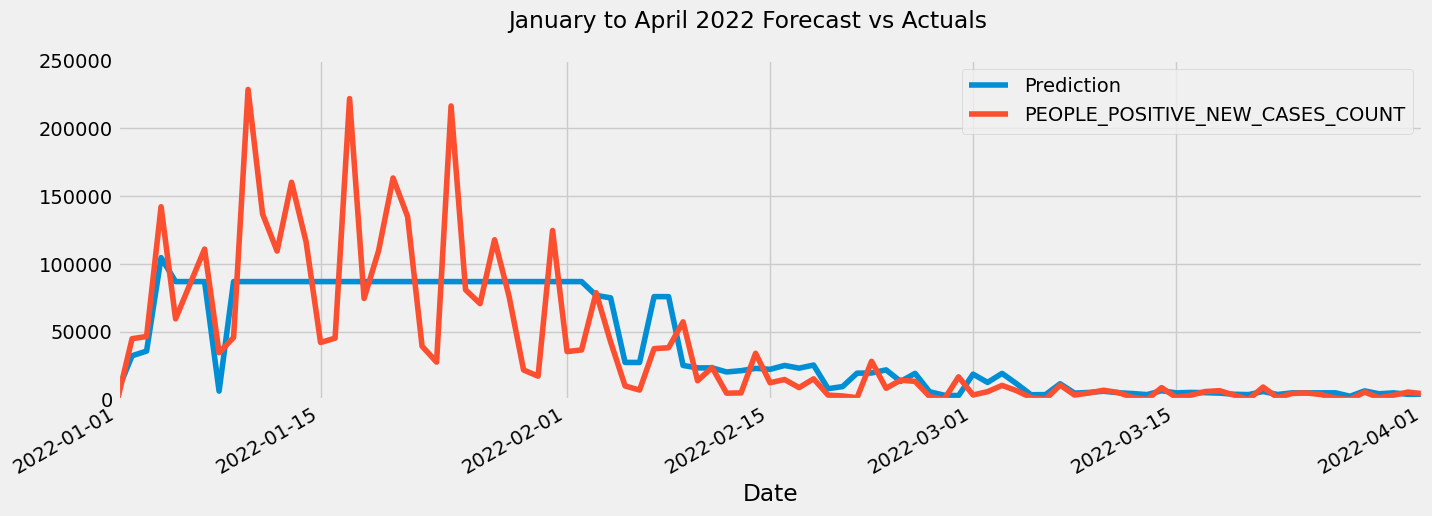

In [53]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_CA[['Prediction','PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='01-01-2022', upper='04-01-2022')
ax.set_ylim(0, 250000)
plot = plt.suptitle('January to April 2022 Forecast vs Actuals')

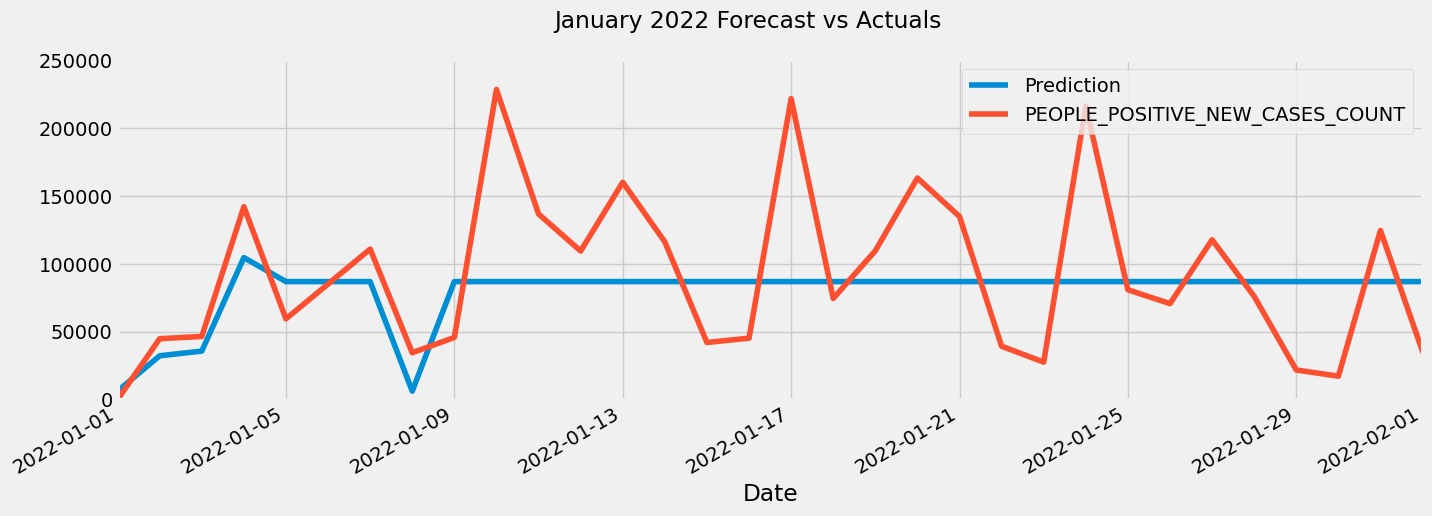

In [54]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_CA[['Prediction','PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='01-01-2022', upper='02-01-2022')
ax.set_ylim(0, 250000)
plot = plt.suptitle('January 2022 Forecast vs Actuals')

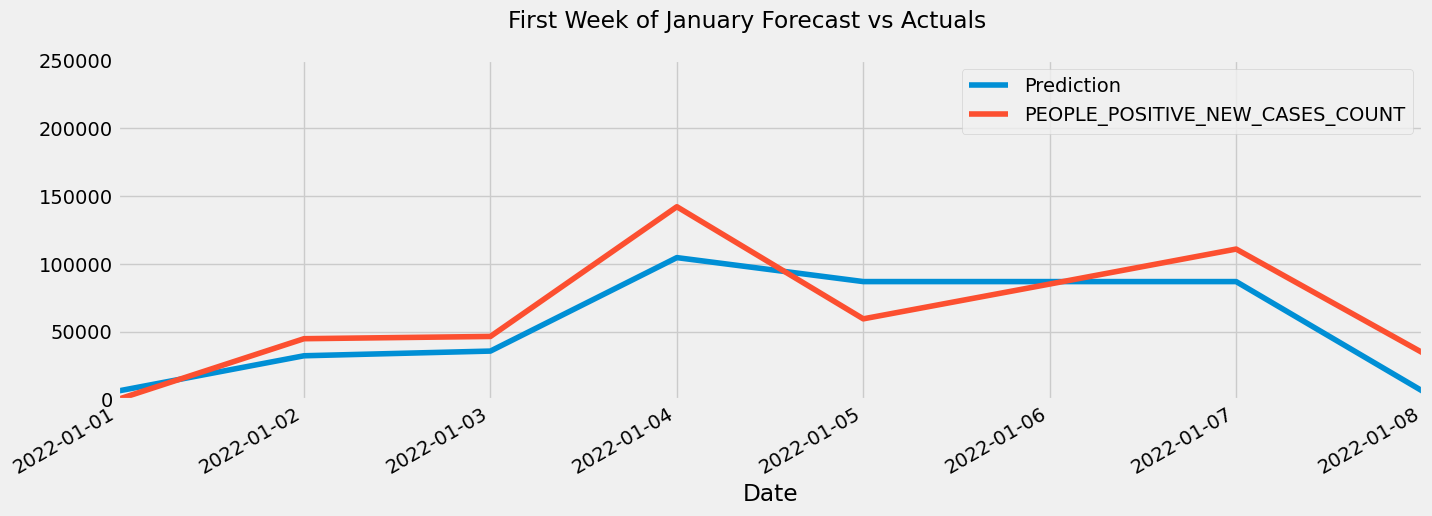

In [55]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_CA[['Prediction','PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='01-01-2022', upper='01-08-2022')
ax.set_ylim(0, 250000)
plot = plt.suptitle('First Week of January Forecast vs Actuals')

### Error

In [56]:
try_ = df_CA
try_ = try_.sort_index(ascending=True)

In [57]:
df_test_state = try_[try_['Prediction'].notna()]
df_test_state

,contact_tracing,debt_relief,restrictions_on_internal_movement,current_intensive_care_patients,facial_coverings,public_information_campaigns,testing_policy,income_support,public_transport_closing,new_cases_50_min,...,vaccination_policy,maximum_temperature_celsius,prop_age85plus,prop_age6064,prop_age8084,vaccination_rate_1dose,PEOPLE_POSITIVE_NEW_CASES_COUNT,PROVINCE_STATE_NAME,STATE,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2.0,2.0,1.0,1226.0,2.0,2.0,3.0,1.0,0.0,0.0,...,5.0,10.061111,1.894541,5.897176,1.830623,0.814215,0,California,0,6173.728027
2022-01-02,2.0,2.0,1.0,1265.0,2.0,2.0,3.0,1.0,0.0,0.0,...,5.0,12.244444,1.894541,5.897176,1.830623,0.814215,44710,California,0,32159.476562
2022-01-03,2.0,2.0,1.0,1282.0,2.0,2.0,3.0,1.0,0.0,0.0,...,5.0,12.583333,1.894541,5.897176,1.830623,0.815603,46362,California,0,35607.285156
2022-01-04,2.0,2.0,1.0,1398.0,2.0,2.0,3.0,1.0,0.0,0.0,...,5.0,14.455556,1.894541,5.897176,1.830623,0.816247,141752,California,0,104328.960938
2022-01-05,2.0,2.0,1.0,1434.0,2.0,2.0,3.0,1.0,0.0,0.0,...,5.0,15.127778,1.894541,5.897176,1.830623,0.817361,59311,California,0,86702.398438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,1.0,1.0,1.0,102.0,2.0,2.0,3.0,0.0,0.0,0.0,...,5.0,28.561111,1.894541,5.897176,1.830623,0.818862,4531,California,0,13175.877930
2022-04-26,1.0,1.0,1.0,122.0,2.0,2.0,3.0,0.0,0.0,0.0,...,5.0,28.277778,1.894541,5.897176,1.830623,0.818984,16180,California,0,11210.429688
2022-04-27,1.0,1.0,1.0,133.0,2.0,2.0,3.0,0.0,0.0,0.0,...,5.0,25.316667,1.894541,5.897176,1.830623,0.819211,1852,California,0,4272.156738


In [58]:
model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

Test RMSE:  30913.342645575955
Test MAE:  16996.57788496258


In [59]:
model_rmse = mean_squared_error(df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test['Prediction'], squared=False)
model_mae = mean_absolute_error(df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test['Prediction'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

Test RMSE:  19412.50517459232
Test MAE:  6859.842581112374


In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
model_mape = mean_absolute_percentage_error(y_true=df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT'],
                   y_pred=df_test['Prediction'])
print('Test MAPE: ', model_mape)

Test MAPE:  inf


/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_11260/1542411197.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [62]:
model_mape = mean_absolute_percentage_error(y_true=df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'],
                   y_pred=df_test_state['Prediction'])
print('Test MAPE: ', model_mape)

Test MAPE:  inf


/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_11260/1542411197.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [63]:
actuals = df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test MASE: 0.5009349520976899


In [64]:
actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test MASE: 0.2932848250465438


### Cross Validation

In [71]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3, test_size = 7900-6715, gap = 24)
df_checkpoint2 = df_checkpoint.sort_index()

In [72]:
df_train = df_checkpoint2.iloc[:6715]
df_test = df_checkpoint2.iloc[6715:]

In [73]:
X_train = df_train.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
y_train = df_train['PEOPLE_POSITIVE_NEW_CASES_COUNT']

X_test = df_test.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
y_test = df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT']

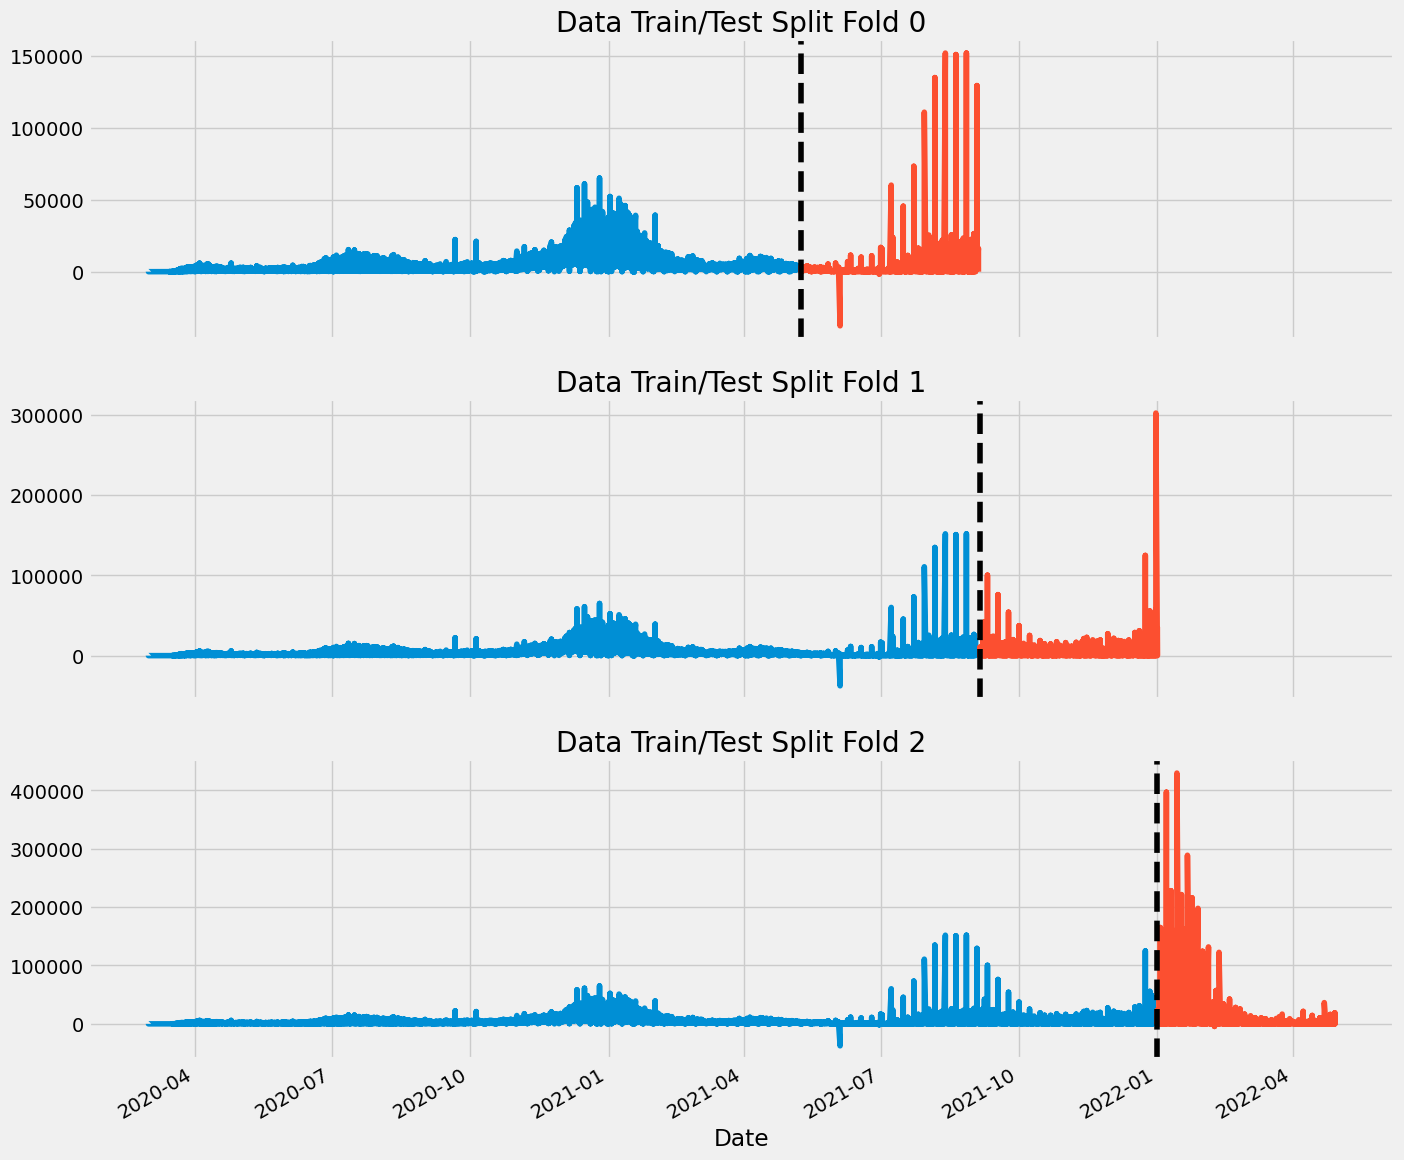

In [74]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df_checkpoint2):
    train = df_checkpoint2.iloc[train_idx]
    test = df_checkpoint2.iloc[val_idx]
    train['PEOPLE_POSITIVE_NEW_CASES_COUNT'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PEOPLE_POSITIVE_NEW_CASES_COUNT'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [75]:
tss = TimeSeriesSplit(n_splits = 3, test_size = 7900-6900, gap = 24)
df_checkpoint2 = df_checkpoint2.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_checkpoint2):
    train = df_checkpoint2.iloc[train_idx]
    test = df_checkpoint2.iloc[val_idx]
    TARGET = 'PEOPLE_POSITIVE_NEW_CASES_COUNT'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[0]	validation_0-rmse:9069.18043	validation_1-rmse:31687.22102


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [03:06:51] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4646.64230	validation_1-rmse:20066.33401
[157]	validation_0-rmse:3633.54023	validation_1-rmse:19275.48109
[0]	validation_0-rmse:9069.18043	validation_1-rmse:31687.22102


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [03:06:53] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4646.64230	validation_1-rmse:20066.33401
[158]	validation_0-rmse:3621.29051	validation_1-rmse:19305.85282
[0]	validation_0-rmse:9069.18043	validation_1-rmse:31687.22102


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [03:06:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4646.64230	validation_1-rmse:20066.33401
[158]	validation_0-rmse:3621.29051	validation_1-rmse:19305.85282


In [76]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 18923.7315
Fold scores:[18923.731480260118, 18923.731480260118, 18923.731480260118]
